# Visualizing the Titanic Disaster

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)

It is recomended also to use **seaborn** library

### Step 1. Import the necessary libraries

Per a realitzar l'exercici, importam les següents llibreries.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from titanic.csv 

### Step 3. Assign it to a variable titanic 

A més, importam el dataset ```titanic.csv``` i l'assignam a la variable _titanic_.

In [2]:
titanic=pd.read_csv('data/titanic.csv')

Visualitzem les primeres observacions.

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 4. Set PassengerId as the index 

A continuació, indexam el dataset _titanic_ per la columna <span style="color:#B43104">'PassengerId'</span> amb _set.index()_ i l'eliminam amb _drop()_.

In [4]:
titanic = titanic.set_index(titanic['PassengerId'])
titanic= titanic.drop('PassengerId', axis=1)

Vegem les primeres files del nou dataset.

In [5]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 5. Create a pairplot to check how variables correlate

La funció pairplot de la llibreria <span style="color:#DF7401">**seaborn**</span> no funciona bé si hi ha observacions amb ```NaN```. Així, vegem quines dimensions té el nostre dataset i quants de caràcters buits hi ha per columna.

In [6]:
#files,columnes
titanic.shape

(891, 11)

In [7]:
#NaN per columnes
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

La columna <span style="color:#B43104">'Cabin'</span> té 687 ```NaN``` de 891 elements, és a dir, li falta molta informació. A més, la variable conté informació sobre el nombre de Cabina de cada passatger, i per tant, no podem substituir els ```NaN``` per un altre valor. Així, eliminam tota la columna.

Abans, guardam el dataset original a la variable *titanic_old*.

In [8]:
titanic_old=titanic

Eliminam la columna  <span style="color:#B43104">'Cabin'</span>.

In [9]:
titanic= titanic.drop('Cabin', axis=1)

L'altra columna amb molts ```NaN``` és <span style="color:#B43104">'Age'</span>. En aquest cas, substituïm els ```NaN``` per la mitjana de l'edat dels passatgers amb la funció _fillna()_, tal com segueix.

In [10]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

Ara, queda una columna amb ```NaN``` en el nostre dataset, <span style="color:#B43104">'Embarked'</span>. Com només conté dos elements buits, prenem totes les files menys aquestes dues.

In [11]:
titanic=titanic[-titanic['Embarked'].isnull()]

Comprovem com el dataset _titanic_ resultant no té cap ```NaN```.

In [12]:
titanic.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Finalment, ens pot interesar fer el plot de la variable Sex. Per tant, indicam canviam _male_ per '1' i _female_ per '0'.

In [13]:
male = titanic['Sex'] =='male'
female = -male

titanic.loc[male,'Sex']=1
titanic.loc[female,'Sex']=0

titanic['Sex']=titanic['Sex'].astype('int64')

D'aquesta manera, podem fer el pairplot de les variables tal com segueix. Notem que imposam que els plots distingeixin per color si el punt al pla correspon a un passatger que va sobreviure o no.

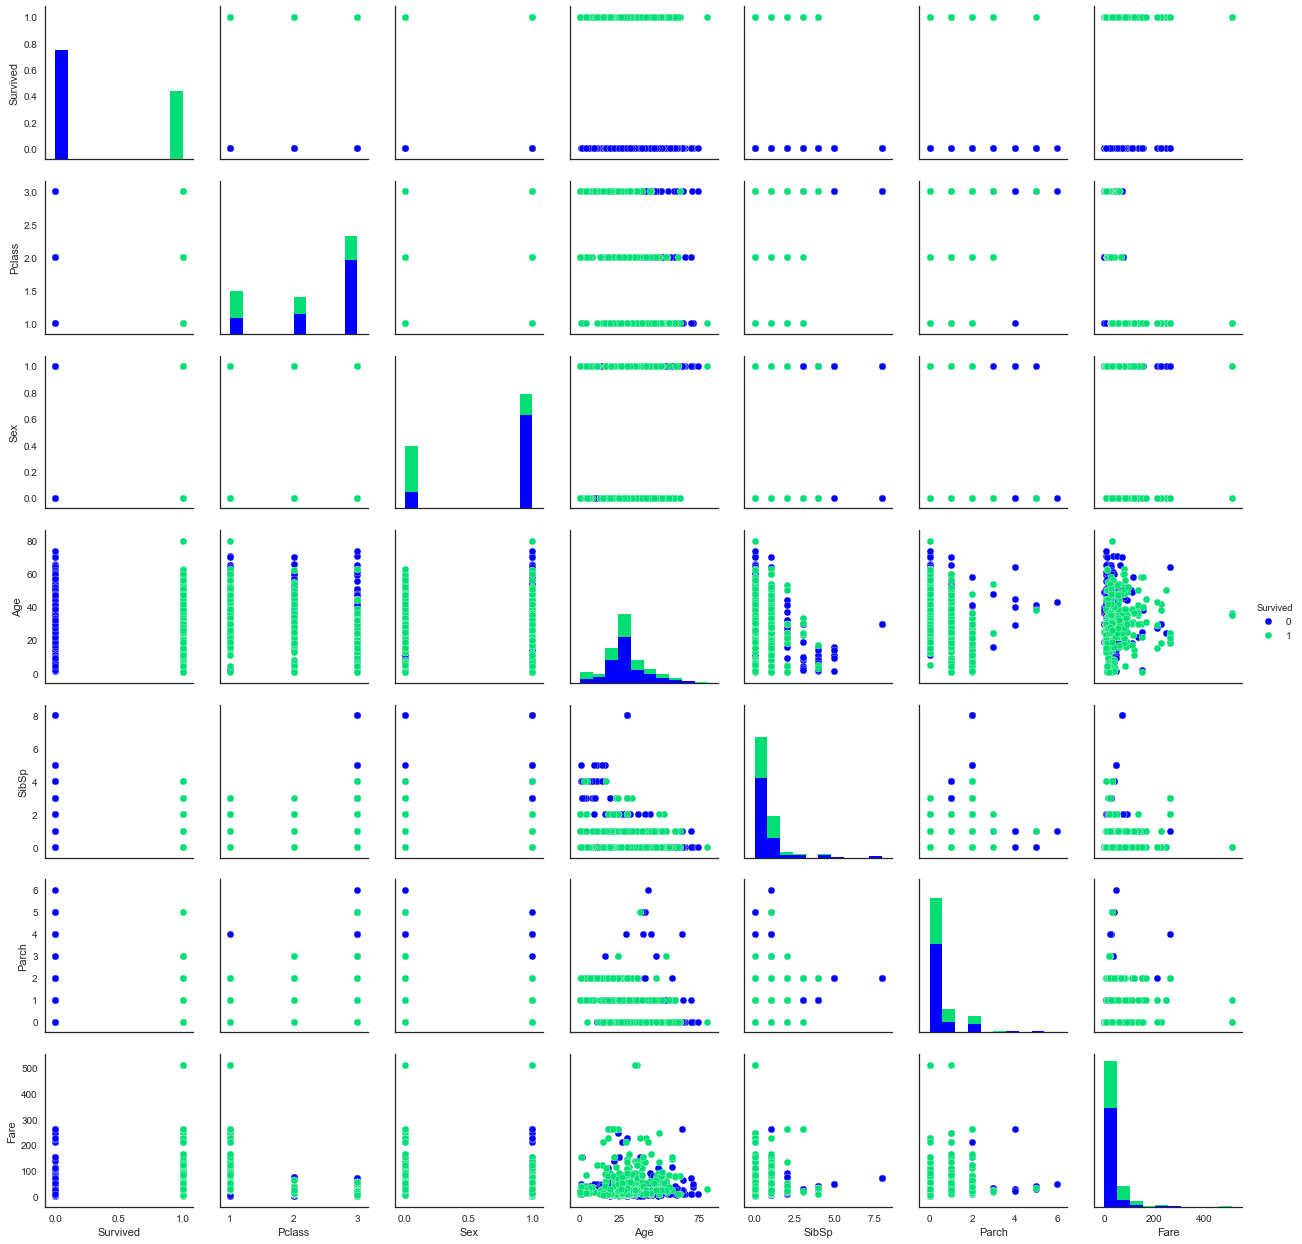

In [14]:
sns.set(style='white')
sns.pairplot(titanic,hue='Survived', palette=['#0000FF','#01DF74'])

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

La funció _pairplot_ també ens permet fer un scatterplot de la variable ```Age``` vs ```Fare``` i diferenciar els punts resultants per color, segons la variable ```Sex```. <div>
Vegem-ho. Abans però, cream un nou dataset, *new_titanic*, que recuperi la columna <span style="color:#B43104">'Sex'</span> amb els valors _male_ i _female_.

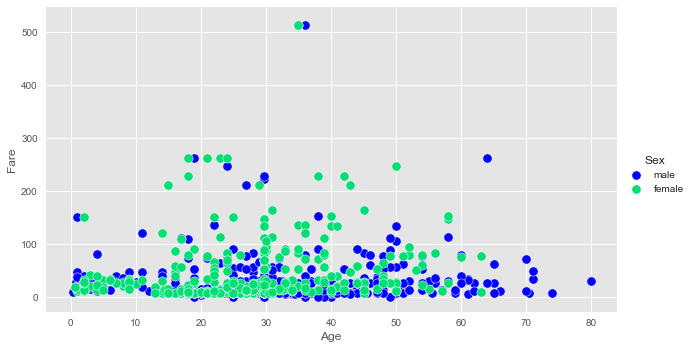

In [15]:
plt.style.use('ggplot')

#Tornam a male-female, per fer més comprensible el plot.
new_titanic=titanic.copy()
new_titanic['Sex']=titanic_old.loc[-titanic_old['Embarked'].isnull(),'Sex']

sns.pairplot(x_vars='Age', y_vars='Fare', hue='Sex', palette=['#0000FF','#01DF74'], data=new_titanic, size=5, 
             aspect=1.75, plot_kws={'s': 85})

### Step 7. How many people survived?

Per saber quanta gent va sobreviure, basta sumar els 1 que hi ha a la columna <span style="color:#B43104">'Survived'</span>. <div> Empram el dataset *titanic_old* perquè hem eliminat dues observacions.

In [16]:
print('Survived (original dataset):',sum(titanic_old['Survived']), '.')

Survived (original dataset): 342 .


Vegem quins canvis hi ha amb el nou dataset _titanic_.

In [17]:
print('Survived:',sum(titanic['Survived']), '.')

Survived: 340 .


Aleshores, hem eliminat 2 passatgers que varen sobreviure.

### Step 8. Create a histogram with the Fare payed

Per crear l'histograma, basta emprar la funció _hist_.

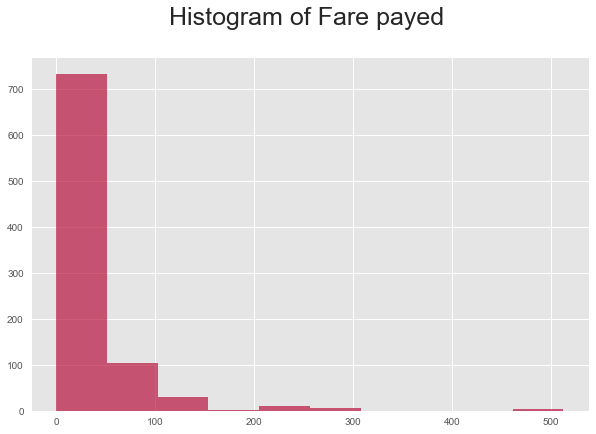

In [18]:
plt.figure(figsize=(10,6.5))
titanic['Fare'].hist(facecolor='#B40431', alpha=0.65)
plt.title('Histogram of Fare payed \n', fontsize=25)

### Step 9: Create a diagonal correlation plot af all variables ([tip](http://seaborn.pydata.org/examples/many_pairwise_correlations.html))

Emprant el codi de l'enllaç podem crear el plot de correlacions de les variables numèriques de _titanic_.

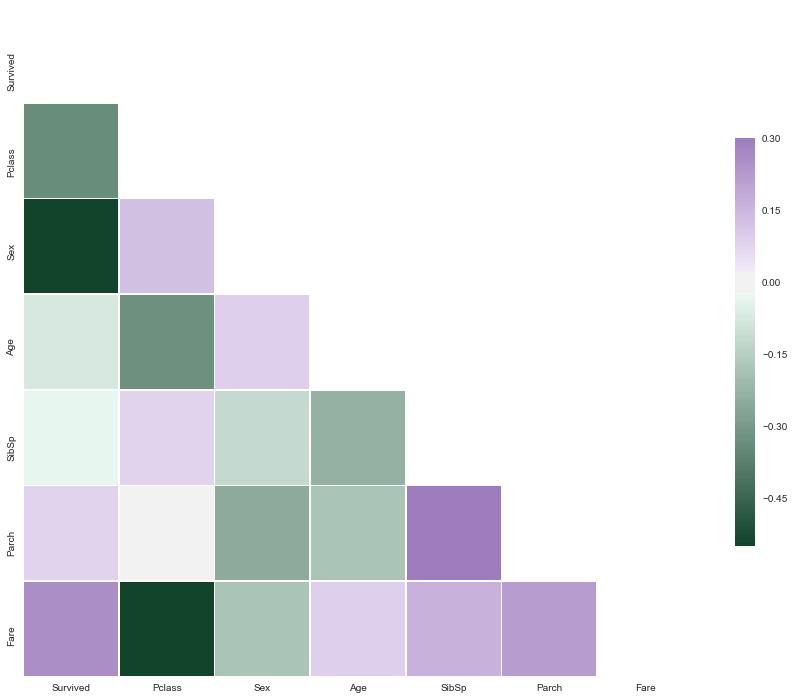

In [19]:
sns.set(style="white")

# Compute the correlation matrix
corr = titanic.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap =sns.diverging_palette(145, 280, s=85, l=25, n=7, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})